In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18, z_at_value
import astropy.units as u

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Hubble time (in Myr):
t_Hub = Planck18.age(0.0).value * 1000
print(t_Hub)

13786.885302009709


In [3]:
ages = np.linspace(100.0, t_Hub-0.1, 5000)
redshifts = z_at_value(Planck18.age, ages * u.Myr).value

In [4]:
np.savez('./ages_redshifts_table_Planck18.npz', age=ages, redshift=redshifts)

In [5]:
age = np.load('./ages_redshifts_table_Planck18.npz')['age']
redshift = np.load('./ages_redshifts_table_Planck18.npz')['redshift']

def redshift_interp(t): return np.interp(t, age, redshift)
def age_interp(z): return np.interp(z, np.flip(redshift), np.flip(age))

Text(0, 0.5, '$\\Delta z/z$')

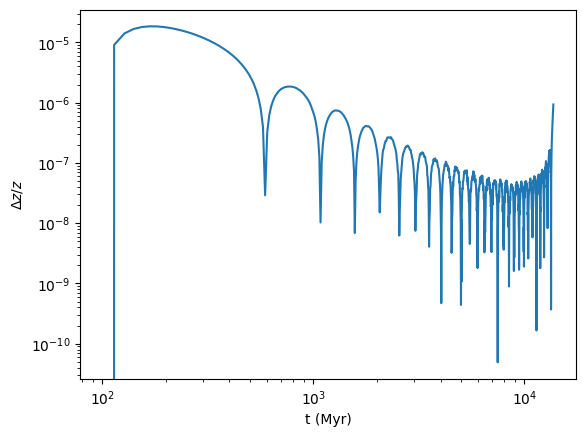

In [6]:
t = np.linspace(100, 13700, 10**3)
plt.plot(t, np.abs(redshift_interp(t) - z_at_value(Planck18.age, t * u.Myr)) / z_at_value(Planck18.age, t * u.Myr))
plt.loglog()
plt.xlabel('t (Myr)')
plt.ylabel('$\Delta z/z$')

Text(0, 0.5, '$\\Delta t/t$')

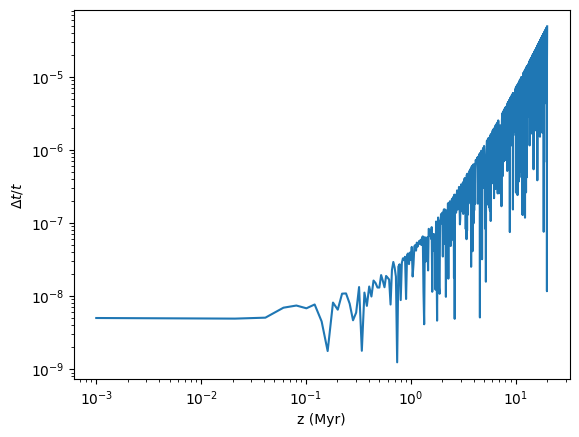

In [7]:
z = np.linspace(0.001, 20.0, 10**3)
plt.plot(z, np.abs(age_interp(z) - Planck18.age(z).value*1e3) / (Planck18.age(z).value*1e3))
plt.loglog()
plt.xlabel('z (Myr)')
plt.ylabel('$\Delta t/t$')